In [224]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
# %matplotlib widget
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_digits
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn import preprocessing
from datetime import datetime
from datetime import timedelta
import statistics as s
import scipy as stats
import statsmodels.api as sm
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, transforms
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.datasets import mnist
import yfinance as yf
from datetime import date
import matplotlib.dates as mdates
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.neighbors import LocalOutlierFactor
import schedule
import time
from scipy.spatial import cKDTree
from matplotlib.patches import Circle

In [2]:
pocket_move_df = pd.read_csv('pocket_sorted_time.csv') #'spiral_date_test1.txt', delimiter='\t')
spiral_move_df = pd.read_csv('spiral_sorted_time_2.csv') #'spiral_date_test1.txt', delimiter='\t')

In [ ]:
gcode_movement_values = pd.read_csv("gcode_movement_num.csv", delimiter=',')
spiral_gcode_values = pd.read_csv("spiral_gcode_movement_num.csv", delimiter=',')
cube_gcode_values = pd.read_csv("cube_gcode_movement_num.csv", delimiter=',') # the gcode for the good parts
# spiral_movement = pd.read_csv('spiral_sorted_time_2.csv')

In [4]:
cube_movement = pd.read_csv("data 3.csv", delimiter=',')

In [5]:
cube_move_graph_xyz = cube_movement.drop(columns=['a', 'b'])

<Axes: >

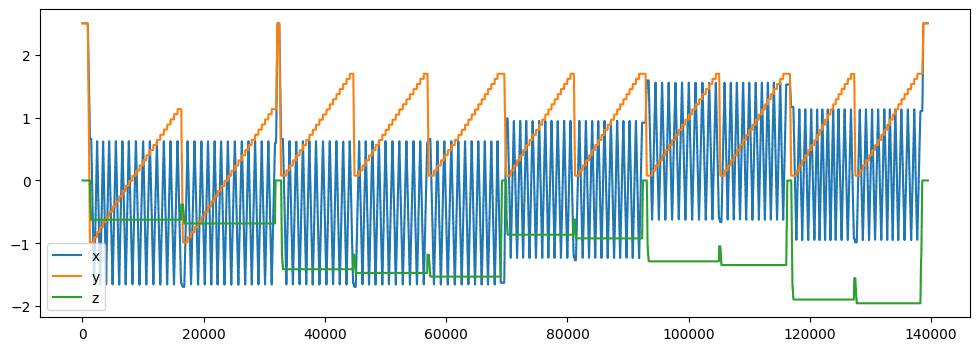

In [6]:
cube_move_graph_xyz.plot(figsize=(12, 4))

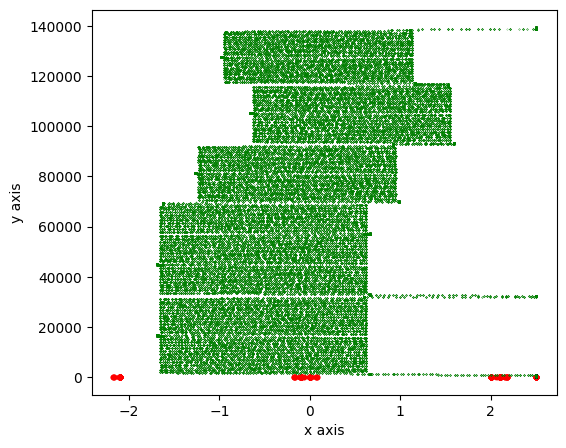

In [7]:
plt.figure(figsize=(6, 5))

plt.scatter(cube_gcode_values['x'], cube_gcode_values['y'], marker='o', s=10, c='r')
plt.scatter(cube_move_graph_xyz['x'], cube_move_graph_xyz.index, marker='.', s=0.1, c='g')

plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()

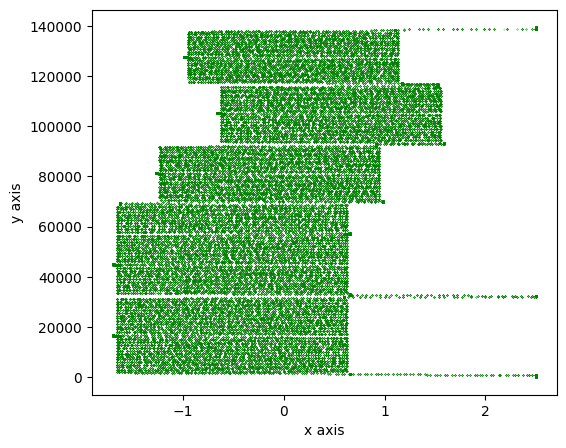

In [8]:
plt.figure(figsize=(6, 5))

plt.scatter(cube_move_graph_xyz['x'], cube_move_graph_xyz.index, marker='.', s=0.1, c='g')

plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()

In [9]:
cube_move_good = cube_movement.copy()
cube_move_good2 = cube_movement.copy()
cube_move_bad = cube_movement.copy()
cube_move_bad2 = cube_movement.copy()

testing on movement data

In [10]:
cube_move_good['target'] = 1
cube_move_good2['target'] = 1

cube_move_bad['target'] = 0
cube_move_bad2['target'] = 0

In [11]:
cube_move_concat_df = pd.concat([cube_move_good, cube_move_good2, cube_move_bad, cube_move_bad2], axis=0)

cube_move_x_df = pd.concat([cube_move_good['x'], cube_move_good2['x'], cube_move_bad['x'], cube_move_bad2['x']], axis=0)
cube_move_y_df = pd.concat([cube_move_good['y'], cube_move_good2['y'], cube_move_bad['y'], cube_move_bad2['y']], axis=0)
cube_move_z_df = pd.concat([cube_move_good['z'], cube_move_good2['z'], cube_move_bad['z'], cube_move_bad2['z']], axis=0)

cube_move_x_df = pd.concat([cube_move_x_df, cube_move_concat_df['target']], axis=1)
cube_move_y_df = pd.concat([cube_move_y_df, cube_move_concat_df['target']], axis=1)
cube_move_z_df = pd.concat([cube_move_z_df, cube_move_concat_df['target']], axis=1)

Original split knn models

In [12]:
# Xx = cube_move_x_df.drop(columns=['target'])
# yx = pd.DataFrame(cube_move_x_df['target'])

# # pca = PCA(n_components = 2)
# # fps_X = pca.fit_transform(X)

# X_trainx, X_testx, y_trainx, y_testx = train_test_split(Xx, yx, test_size=0.3, random_state=42, shuffle=True)


# # scaler = RobustScaler()
# # X_train = scaler.fit_transform(X_train)
# # X_test = scaler.transform(X_test)
# # y_train

# knnx = KNeighborsClassifier(n_neighbors=5)
# knnx.fit(X_trainx, y_trainx)

# y_predx = knnx.predict(X_testx)

# accuracyx = accuracy_score(y_testx, y_predx)
# print("Length: ", len(X_testx))
# print("Accuracy:", accuracyx)
# class_reportx = classification_report(y_testx, y_predx)
# print("Classification Report:\n", class_reportx)

# # print("Percent 0 predicted: ", (((y_predx == 0).sum()/len(X_testx * 100))))

In [13]:
# Xy = cube_move_y_df.drop(columns=['target'])
# yy = pd.DataFrame(cube_move_y_df['target'])

# X_trainy, X_testy, y_trainy, y_testy = train_test_split(Xy, yy, test_size=0.3, random_state=42, shuffle=True)

# knny = KNeighborsClassifier(n_neighbors=5)
# knny.fit(X_trainy, y_trainy)

# y_predy = knny.predict(X_testy)

# accuracyy = accuracy_score(y_testy, y_predy)
# print("Length: ", len(X_testy))
# print("Accuracy:", accuracyy)
# class_reporty = classification_report(y_testy, y_predy)
# print("Classification Report:\n", class_reporty)

# # print("Percent predicted: ", (((y_predy == 0).sum()/len(X_testy * 100))))

In [14]:
# Xz = cube_move_z_df.drop(columns=['target'])
# yz = pd.DataFrame(cube_move_z_df['target'])

# X_trainz, X_testz, y_trainz, y_testz = train_test_split(Xz, yz, test_size=0.3, random_state=42, shuffle=True)

# knnz = KNeighborsClassifier(n_neighbors=5)
# knnz.fit(X_trainz, y_trainz)

# y_predz = knnz.predict(X_testz)

# accuracyz = accuracy_score(y_testz, y_predz)
# print("Length: ", len(X_testz))
# print("Accuracy:", accuracyz)
# class_reportz = classification_report(y_testz, y_predz)
# print("Classification Report:\n", class_reportz)

# # print("Percent 0 predicted: ", (((y_predz == 0).sum()/len(X_testz * 100))))

use neural network to make prediction from knn

In [15]:
# y_pred = knn.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# print("Length: ", len(X_test))
# print("Accuracy:", accuracy)
# class_report = classification_report(y_test, y_pred)
# print("Classification Report:\n", class_report)

# print("Prediction accuracy: ", (((y_pred == 0).sum()/len(X_test * 100))))

a test like this will eventually be passed to one model, not split up

In [16]:
cube_move_bad_test = cube_movement.copy()

cube_move_bad_test.loc[cube_move_bad_test['x'] != 0, 'x'] = cube_move_bad_test.loc[cube_move_bad_test['x'] != 0, 'x'] + 0.05 # predicts 85% the values from training
cube_move_bad_test.loc[cube_move_bad_test['y'] != 0, 'y'] = cube_move_bad_test.loc[cube_move_bad_test['y'] != 0, 'y'] + 0.06
cube_move_bad_test.loc[cube_move_bad_test['z'] != 0, 'z'] = cube_move_bad_test.loc[cube_move_bad_test['z'] != 0, 'z'] + 0.01

In [17]:
cube_move_bad_test['target'] = 0

In [18]:
cube_move_bad_test

a        b     x     y    z  target
0      -0.0  -0.0000  2.55  2.56  0.0       0
1      -0.0  -0.0000  2.55  2.56  0.0       0
2      -0.0  -0.0000  2.55  2.56  0.0       0
3      -0.0  -0.0000  2.55  2.56  0.0       0
4      -0.0  -0.0000  2.55  2.56  0.0       0
...     ...      ...   ...   ...  ...     ...
139453  0.0  20.1381  2.55  2.56 -0.0       0
139454  0.0  20.1381  2.55  2.56 -0.0       0
139455  0.0  18.3001  2.55  2.56 -0.0       0
139456  0.0  18.3001  2.55  2.56 -0.0       0
139457  0.0  18.3001  2.55  2.56 -0.0       0

[139458 rows x 6 columns]

In [19]:
# X_newx = cube_move_bad_test.drop(columns=['target', 'a', 'b', 'y', 'z'])
# y_newx = pd.DataFrame(cube_move_bad_test['target'])

# X_newy = cube_move_bad_test.drop(columns=['target', 'a', 'b', 'x', 'z'])
# y_newy = pd.DataFrame(cube_move_bad_test['target'])

# X_newz = cube_move_bad_test.drop(columns=['target', 'a', 'b', 'x', 'y'])
# y_newz = pd.DataFrame(cube_move_bad_test['target'])

# X_trainnewx, X_testnewx, y_trainnewx, y_testnewx = train_test_split(X_newx, y_newx, test_size=0.99, random_state=42, shuffle=True)
# X_trainnewy, X_testnewy, y_trainnewy, y_testnewy = train_test_split(X_newy, y_newy, test_size=0.99, random_state=42, shuffle=True)
# X_trainnewz, X_testnewz, y_trainnewz, y_testnewz = train_test_split(X_newz, y_newz, test_size=0.99, random_state=42, shuffle=True)

# # scaler = RobustScaler()
# # X_train = scaler.fit_transform(X_trainx)
# # X_testnew = scaler.transform(X_test)
# # y_train

# y_prednewx = knnx.predict(X_testnewx)
# y_prednewy = knny.predict(X_testnewy)
# y_prednewz = knnz.predict(X_testnewz)

# # accuracy = accuracy_score(y_test, y_prednew)
# # print("Length: ", len(X_testnew))
# # print("Accuracy:", accuracy)
# # class_report = classification_report(y_test, y_prednew)
# # print("Classification Report:\n", class_report)

# print("Percent predicted: ", (((y_prednewx == 0).sum()/len(X_testnewx) * 100)))
# print("Percent predicted: ", (((y_prednewy == 0).sum()/len(X_testnewy) * 100)))
# print("Percent predicted: ", (((y_prednewz == 0).sum()/len(X_testnewz) * 100)))

In [20]:
# accuracynewx = accuracy_score(y_testnewx, y_prednewx)
# print("Length: ", len(X_testnewx))
# print("Accuracy:", accuracynewx)
# class_reportnewx = classification_report(y_testnewx, y_prednewx)
# print("Classification Report:\n", class_reportnewx)

In [21]:
# accuracynewy = accuracy_score(y_testnewy, y_prednewy)
# print("Length: ", len(X_testnewy))
# print("Accuracy:", accuracynewx)
# class_reportnewy = classification_report(y_testnewy, y_prednewy)
# print("Classification Report:\n", class_reportnewy)

In [22]:
# accuracynewz = accuracy_score(y_testnewz, y_prednewz)
# print("Length: ", len(X_testnewz))
# print("Accuracy:", accuracynewz)
# class_reportnewz = classification_report(y_testnewz, y_prednewz)
# print("Classification Report:\n", class_reportnewz)

nn

In [23]:
# clf = MLPClassifier(solver='sgd', alpha=1e-5, batch_size=100,
#                     hidden_layer_sizes=(20, 10), learning_rate_init=0.0001, max_iter=10000000, random_state=42, tol=0.00001) # 3 layers of 5, 5, and 2 units (neurons) 

# clf.fit(X_train, y_train)

# X_test = pd.DataFrame(X_test)
# y_pred_nn = clf.predict(X_test)

# proba = clf.predict_proba(X_test[:1])

# #y_pred = knn.predict(X_test) 
# accuracy = accuracy_score(y_test, y_pred_nn) 

# print("Accuracy:", accuracy)

# dotscore = clf.score(X_test, y_test)
# print("The score: ", dotscore)

# print("The proba: ", proba)

# class_report = classification_report(y_test, y_pred_nn)
# print("Classification Report:\n", class_report)

from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

clf = SVC(C=100,gamma=0.0001)
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
clf.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train, clf=clf, legend=2)

plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)

Real movement data

In [24]:
data_good_1_orig = pd.read_csv("data_good_1 - Copy.csv", delimiter=',')
data_good_2_orig = pd.read_csv("data_good_2 - Copy.csv", delimiter=',')
data_good_3_orig = pd.read_csv("data_good_3 - Copy.csv", delimiter=',')
data_good_4_orig = pd.read_csv("data_good_4 - Copy.csv", delimiter=',')

bad_data_1_orig = pd.read_csv("bad_data - Copy.csv", delimiter=',')


In [25]:
data_good_1_orig = data_good_1_orig.dropna()
data_good_2_orig = data_good_2_orig.dropna()
data_good_3_orig = data_good_3_orig.dropna()
data_good_4_orig = data_good_4_orig.dropna()

bad_data_1_orig = bad_data_1_orig.dropna()

In [26]:
good_1 = pd.DataFrame(data_good_1_orig.describe())
good_2 = pd.DataFrame(data_good_2_orig.describe())
good_3 = pd.DataFrame(data_good_3_orig.describe())
good_4 = pd.DataFrame(data_good_4_orig.describe())

bad_1 =  pd.DataFrame(bad_data_1_orig.describe())


In [27]:
# good_1.compare(good_2, keep_shape=True, keep_equal=True)

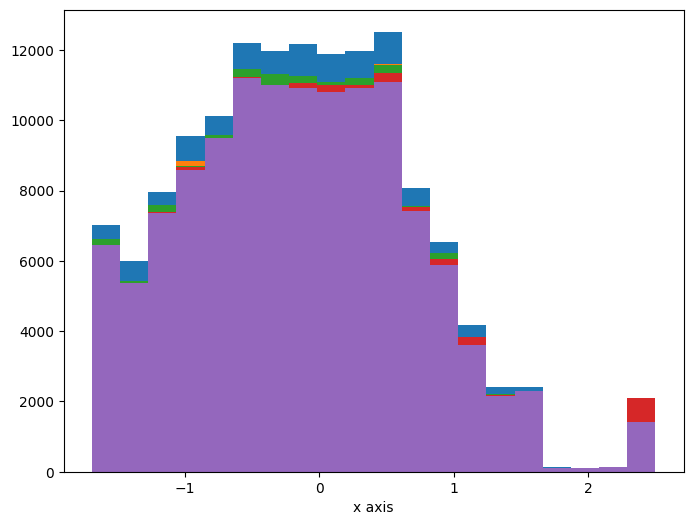

In [28]:
plt.figure(figsize=(8, 6))
plt.hist(data_good_1_orig['x'], bins=20, stacked=True)
plt.hist(data_good_2_orig['x'], bins=20, stacked=True)
plt.hist(data_good_3_orig['x'], bins=20, stacked=True)
plt.hist(data_good_4_orig['x'], bins=20, stacked=True)

plt.hist(bad_data_1_orig['x'], bins=20, stacked=True)

plt.xlabel('x axis')
# plt.ylabel('y axis')
plt.show()

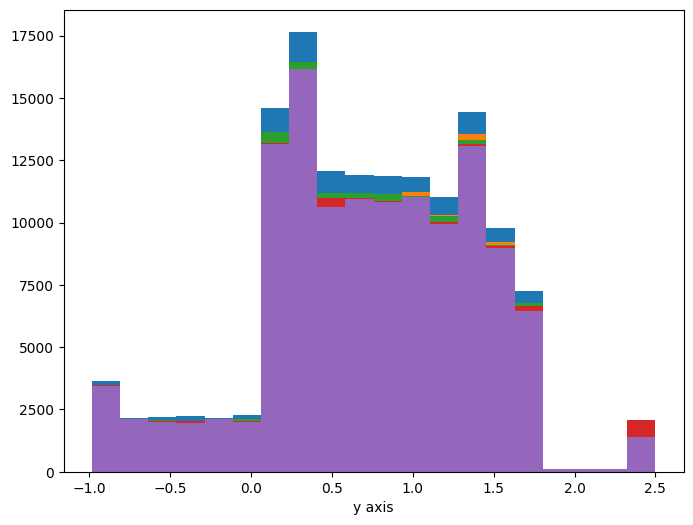

In [29]:
plt.figure(figsize=(8, 6))
plt.hist(data_good_1_orig['y'], bins=20, stacked=True)
plt.hist(data_good_2_orig['y'], bins=20, stacked=True)
plt.hist(data_good_3_orig['y'], bins=20, stacked=True)
plt.hist(data_good_4_orig['y'], bins=20, stacked=True)
plt.hist(bad_data_1_orig['y'], bins=20, stacked=True)

plt.xlabel('y axis')
# plt.ylabel('y axis')
plt.show()

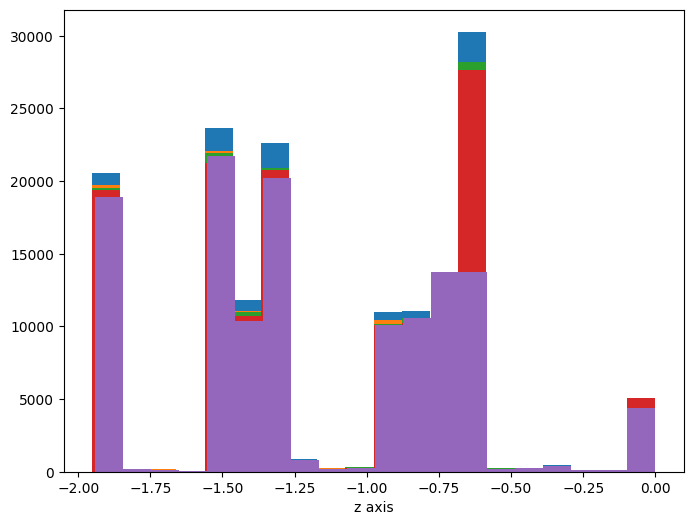

In [30]:
plt.figure(figsize=(8, 6))
plt.hist(data_good_1_orig['z'], bins=20, stacked=True)
plt.hist(data_good_2_orig['z'], bins=20, stacked=True)
plt.hist(data_good_3_orig['z'], bins=20, stacked=True)
plt.hist(data_good_4_orig['z'], bins=20, stacked=True)
plt.hist(bad_data_1_orig['z'], bins=20, stacked=True)

plt.xlabel('z axis')
# plt.ylabel('y axis')
plt.show()

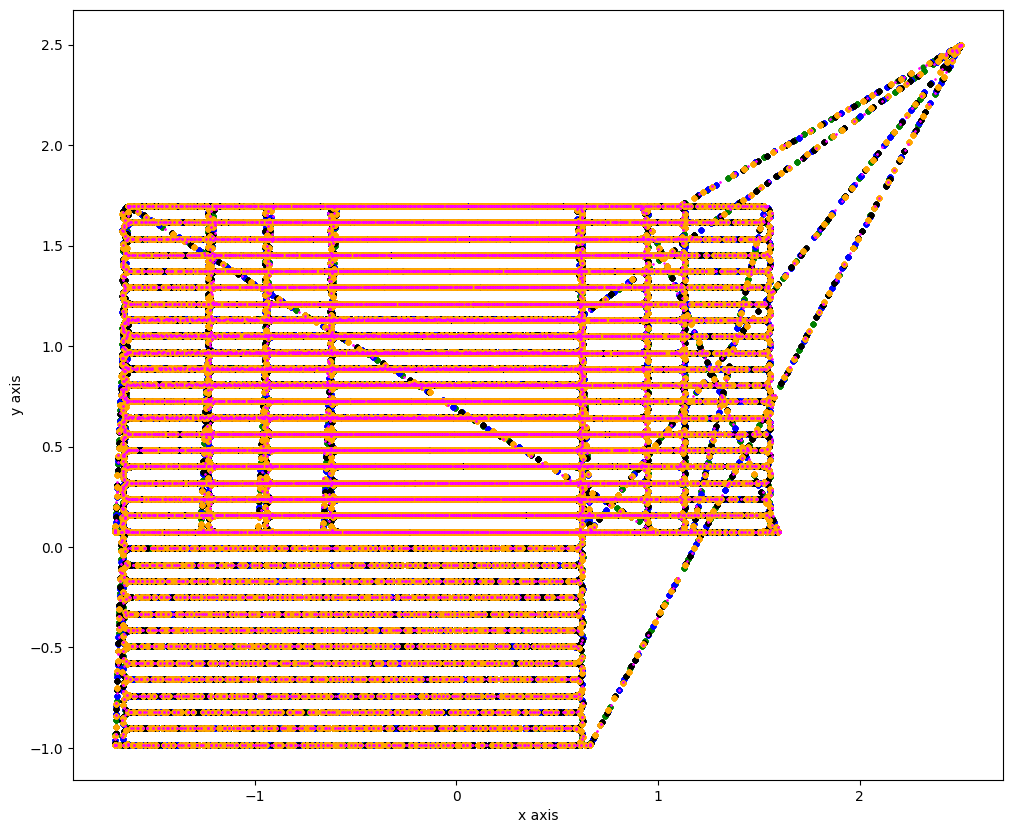

In [31]:
plt.figure(figsize=(12, 10))

plt.scatter(data_good_1_orig['x'], data_good_1_orig['y'], marker='o', s=10, c='g')
plt.scatter(data_good_2_orig['x'], data_good_2_orig['y'], marker='o', s=10, c='b')
plt.scatter(data_good_3_orig['x'], data_good_3_orig['y'], marker='o', s=10, c='black')
plt.scatter(data_good_4_orig['x'], data_good_4_orig['y'], marker='o', s=10, c='orange')

plt.scatter(bad_data_1_orig['x'], bad_data_1_orig['y'], marker='.', s=1, c='magenta', alpha=0.5)

plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()

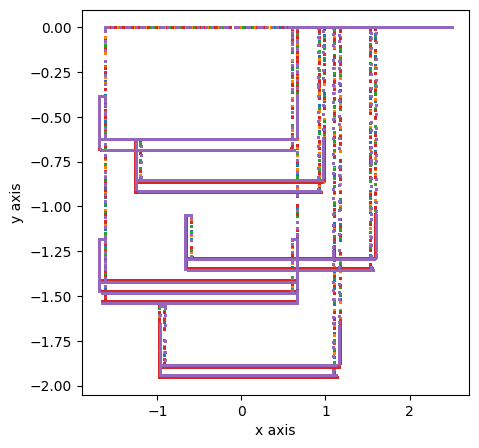

In [32]:
plt.figure(figsize=(5, 5))
plt.scatter(data_good_1_orig['x'], data_good_1_orig['z'], marker='.', s=5)
plt.scatter(data_good_2_orig['x'], data_good_2_orig['z'], marker='.', s=5)
plt.scatter(data_good_3_orig['x'], data_good_3_orig['z'], marker='.', s=5)
plt.scatter(data_good_4_orig['x'], data_good_4_orig['z'], marker='.', s=5)

plt.scatter(bad_data_1_orig['x'], bad_data_1_orig['z'], marker='.', s=5)

plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()

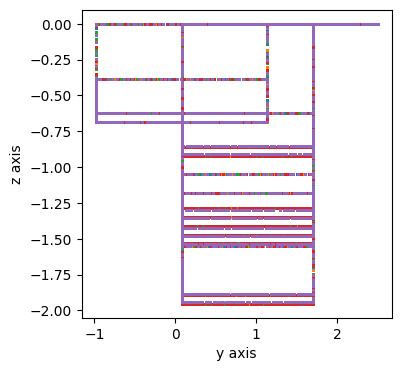

In [33]:
plt.figure(figsize=(4, 4))
plt.scatter(data_good_1_orig['y'], data_good_1_orig['z'], marker='.', s=5)
plt.scatter(data_good_2_orig['y'], data_good_2_orig['z'], marker='.', s=5)
plt.scatter(data_good_3_orig['y'], data_good_3_orig['z'], marker='.', s=5)
plt.scatter(data_good_4_orig['y'], data_good_4_orig['z'], marker='.', s=5)

plt.scatter(bad_data_1_orig['y'], bad_data_1_orig['z'], marker='.', s=5)

plt.xlabel('y axis')
plt.ylabel('z axis')
plt.show()

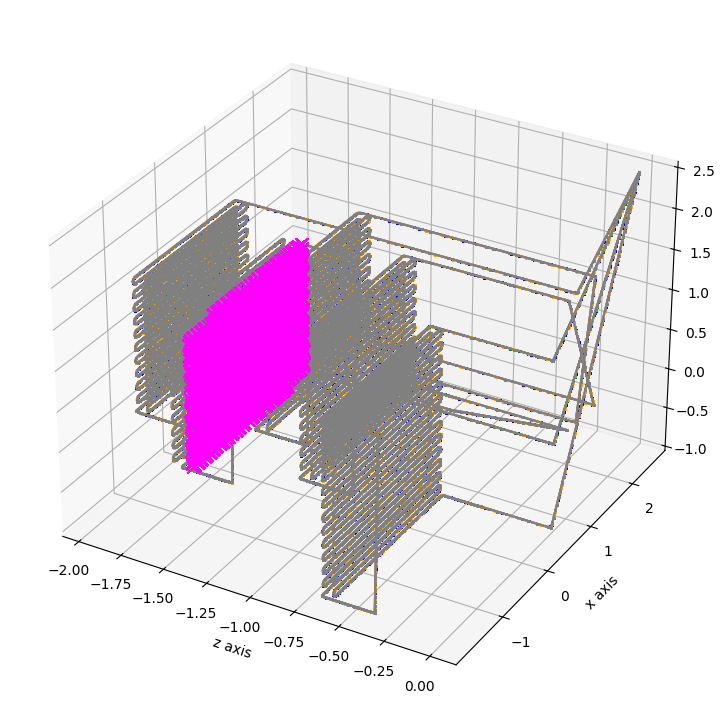

In [34]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
# fig.canvas.draw()
# fig.set_layout_engine("none")
ax.set_position([-0.75, 0.025, 2.5, 1])
# fig = plt.figure()
# ax = Axes3D(fig)
plt.plot(data_good_1_orig['z'].loc[30000:40000], data_good_1_orig['x'].loc[30000:40000], data_good_1_orig['y'].loc[30000:40000], marker='.', markersize=2, c='g')
plt.plot(data_good_2_orig['z'], data_good_2_orig['x'], data_good_2_orig['y'], marker='.', markersize=2, c='b')
plt.plot(data_good_3_orig['z'], data_good_3_orig['x'], data_good_3_orig['y'], marker='.', markersize=2, c='orange')
plt.plot(data_good_4_orig['z'], data_good_4_orig['x'], data_good_4_orig['y'], marker='.', markersize=2, c='grey') # red

plt.plot(bad_data_1_orig['z'].loc[30000:40000], bad_data_1_orig['x'].loc[30000:40000], bad_data_1_orig['y'].loc[30000:40000], marker='x', markersize=8, c='magenta')

plt.xlabel('z axis')
plt.ylabel('x axis')
plt.show()

In [35]:

# copy1 = data_good_1_orig.copy()
# copy2 = data_good_2_orig.copy()
# copy3 = data_good_3_orig.copy()
# copy4 = data_good_4_orig.copy()

# copy5 = bad_data_1_orig.copy()
# # copy4 = copy4 * 1.5

In [36]:
# copy1.to_csv('copy1.csv', index=False)
# copy2.to_csv('copy2.csv', index=False)
# copy3.to_csv('copy3.csv', index=False)
# copy4.to_csv('copy4.csv', index=False)
# copy5.to_csv('copy5.csv', index=False)

In [37]:
copy1 = pd.read_csv("copy1.csv", delimiter=',')
copy2 = pd.read_csv("copy2.csv", delimiter=',')
copy3 = pd.read_csv("copy3.csv", delimiter=',')
copy4 = pd.read_csv("copy4.csv", delimiter=',')
copy5 = pd.read_csv("copy5.csv", delimiter=',')

In [38]:
copy3

x    y    z
0       NaN  NaN  NaN
1       NaN  NaN  NaN
2       NaN  NaN  NaN
3       NaN  NaN  NaN
4       NaN  NaN  NaN
...     ...  ...  ...
129379  2.5  2.5  0.0
129380  2.5  2.5  0.0
129381  2.5  2.5  0.0
129382  2.5  2.5  0.0
129383  2.5  2.5  0.0

[129384 rows x 3 columns]

In [39]:
copy1 = copy1.apply(lambda x: x.dropna().reset_index(drop=True))
copy2 = copy2.apply(lambda x: x.dropna().reset_index(drop=True))
copy3 = copy3.apply(lambda x: x.dropna().reset_index(drop=True))
copy4 = copy4.apply(lambda x: x.dropna().reset_index(drop=True))
copy5 = copy5.apply(lambda x: x.dropna().reset_index(drop=True))

In [40]:
copy3

x       y      z
0       0.6612 -0.9845 -0.002
1       0.6612 -0.9845 -0.002
2       0.6612 -0.9845 -0.002
3       0.6612 -0.9845 -0.002
4       0.6612 -0.9845 -0.002
...        ...     ...    ...
128969  2.5000  2.5000  0.000
128970  2.5000  2.5000  0.000
128971  2.5000  2.5000  0.000
128972  2.5000  2.5000  0.000
128973  2.5000  2.5000  0.000

[128974 rows x 3 columns]

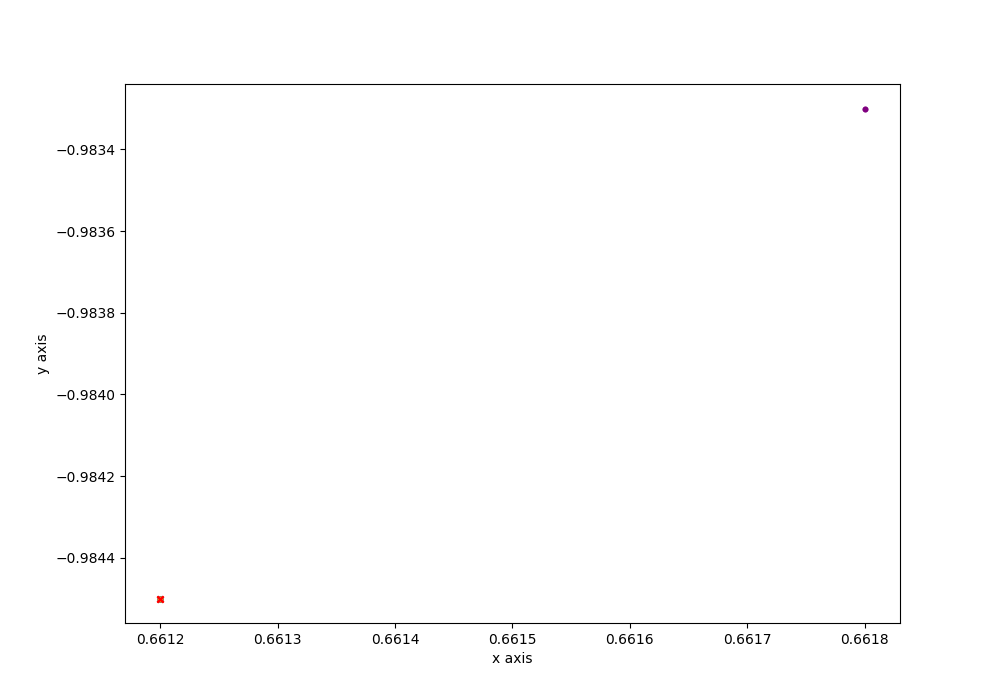

In [41]:
%matplotlib widget

fig = plt.figure(figsize=(10, 7))
# ax = fig.add_subplot(111, projection='3d')

plt.scatter(copy1['x'].iloc[:2], copy1['y'].iloc[:2], marker='.', s=40, c='g')
plt.scatter(copy2['x'].iloc[:2], copy2['y'].iloc[:2], marker='.', s=40, c='b')
plt.scatter(copy3['x'].iloc[:2], copy3['y'].iloc[:2], marker='.', s=40, c='orange')
plt.scatter(copy4['x'].iloc[:2], copy4['y'].iloc[:2], marker='.', s=40, c='purple')

plt.scatter(copy5['x'].iloc[:2], copy5['y'].iloc[:2], marker='x', s=20, c='r')


plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()

In [42]:
# copy1 = copy1.drop(columns=['a', 'b'])
# copy2 = copy2.drop(columns=['a', 'b'])
# copy3 = copy3.drop(columns=['a', 'b'])
# copy4 = copy4.drop(columns=['a', 'b'])
# copy5 = copy5.drop(columns=['a', 'b'])

In [43]:
copy4

x       y       z
0       0.6618 -0.9833 -0.0003
1       0.6618 -0.9833 -0.0003
2       0.6618 -0.9833 -0.0003
3       0.6618 -0.9833 -0.0003
4       0.6618 -0.9833 -0.0003
...        ...     ...     ...
127237  2.5000  2.5000  0.0000
127238  2.5000  2.5000  0.0000
127239  2.5000  2.5000  0.0000
127240  2.5000  2.5000  0.0000
127241  2.5000  2.5000  0.0000

[127242 rows x 3 columns]

In [44]:
# copy1.to_csv('copy1.csv', index=False)
# copy2.to_csv('copy2.csv', index=False)
# copy3.to_csv('copy3.csv', index=False)
# copy4.to_csv('copy4.csv', index=False)
# copy5.to_csv('copy5.csv', index=False)

In [45]:
# copy1 = copy1.dropna()
# copy2 = copy2.dropna()
# copy3 = copy3.dropna()
# copy4 = copy4.dropna()
# copy5 = copy5.dropna()

In [46]:
copy5

x       y       z
0       0.6612 -0.9845 -0.0061
1       0.6612 -0.9845 -0.0061
2       0.6612 -0.9845 -0.0061
3       0.6612 -0.9845 -0.0061
4       0.6612 -0.9845 -0.0061
...        ...     ...     ...
125698  2.5000  2.5000  0.0000
125699  2.5000  2.5000  0.0000
125700  2.5000  2.5000  0.0000
125701  2.5000  2.5000  0.0000
125702  2.5000  2.5000  0.0000

[125703 rows x 3 columns]

In [47]:
# outliers_fraction = 0.1

# clf = LocalOutlierFactor(n_neighbors=5, contamination='auto')
# y_pred = clf.fit_predict(data_combined)
# y_pred = pd.DataFrame(y_pred)

Beginning of knn data

In [48]:
data_combined = pd.concat([copy1['x'], copy2['x'], copy3['x'], copy4['x'], copy5['x']], axis=1)
data_combinedy = pd.concat([copy1['y'], copy2['y'], copy3['y'], copy4['y'], copy5['y']], axis=1)
data_combinedz = pd.concat([copy1['z'], copy2['z'], copy3['z'], copy4['z'], copy5['z']], axis=1)

data_combined = pd.DataFrame(data_combined)
data_combinedy = pd.DataFrame(data_combinedy)
data_combinedz= pd.DataFrame(data_combinedz)


# data_combinedxyz = np.concatenate([data_combined, data_combinedy, data_combinedz], axis=1)
data_combinedxy = pd.DataFrame(data_combinedz)
# data_combinedxy.columns = ['x', 'y', 'z']

data_xy_copy = data_combinedxy.copy()
shuffled_df = data_combinedxy.copy()

array([[<Axes: title={'center': 'x'}>, <Axes: title={'center': 'x'}>],
       [<Axes: title={'center': 'x'}>, <Axes: title={'center': 'x'}>],
       [<Axes: title={'center': 'x'}>, <Axes: >]], dtype=object)

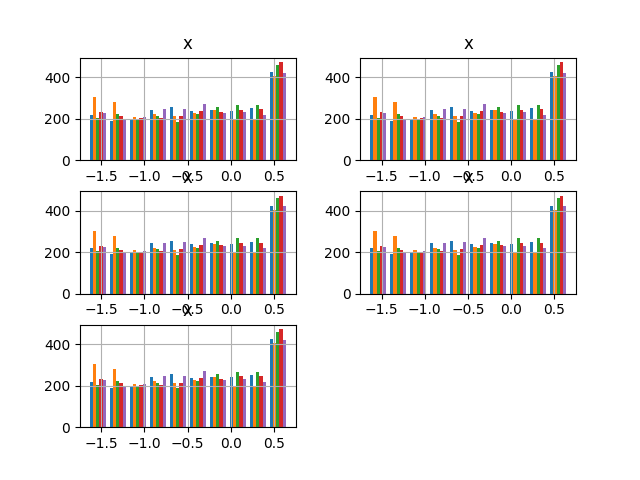

In [49]:
data_combined[:2500].hist()

In [50]:
data_combined.head(5)

x       x       x       x       x
0  0.6612  0.6612  0.6612  0.6618  0.6612
1  0.6612  0.6612  0.6612  0.6618  0.6612
2  0.6612  0.6612  0.6612  0.6618  0.6612
3  0.6612  0.6612  0.6612  0.6618  0.6612
4  0.6612  0.6612  0.6612  0.6618  0.6612

In [51]:
data_combinedxy = data_combinedxy.apply(lambda x: x.dropna().reset_index(drop=True))

In [52]:
data_combinedxy = data_combinedxy.apply(lambda x: x.dropna().reset_index(drop=True))
data_combinedxy = data_combinedxy.dropna()

In [53]:
data_combinedxy

z       z       z       z       z
0      -0.0060 -0.0171 -0.0020 -0.0003 -0.0061
1      -0.0060 -0.0171 -0.0020 -0.0003 -0.0061
2      -0.0060 -0.0171 -0.0020 -0.0003 -0.0061
3      -0.0060 -0.0171 -0.0020 -0.0003 -0.0061
4      -0.0060 -0.0171 -0.0020 -0.0003 -0.0061
...        ...     ...     ...     ...     ...
125698 -1.8938 -1.9529 -1.9529 -0.3944  0.0000
125699 -1.8938 -1.9529 -1.9529 -0.3944  0.0000
125700 -1.8938 -1.9529 -1.9529 -0.3944  0.0000
125701 -1.8938 -1.9529 -1.9529 -0.3944  0.0000
125702 -1.8938 -1.9529 -1.9529 -0.3944  0.0000

[125703 rows x 5 columns]

In [54]:
data_combined

x       x       x       x       x
0       0.6612  0.6612  0.6612  0.6618  0.6612
1       0.6612  0.6612  0.6612  0.6618  0.6612
2       0.6612  0.6612  0.6612  0.6618  0.6612
3       0.6612  0.6612  0.6612  0.6618  0.6612
4       0.6612  0.6612  0.6612  0.6618  0.6612
...        ...     ...     ...     ...     ...
138219  2.5000     NaN     NaN     NaN     NaN
138220  2.5000     NaN     NaN     NaN     NaN
138221  2.5000     NaN     NaN     NaN     NaN
138222  2.5000     NaN     NaN     NaN     NaN
138223  2.5000     NaN     NaN     NaN     NaN

[138224 rows x 5 columns]

In [55]:
# data_combinedxy.to_csv('data_combinedxy.csv', index=False)
# data_combinedxy.to_csv('data_combinedz.csv', index=False)

In [56]:
# data_combinedxy = pd.read_csv("data_combinedxy.csv", delimiter=',')
data_combinedxy = pd.read_csv("data_combinedz.csv", delimiter=',')

In [57]:
data_combinedxy = data_combinedxy.apply(lambda x: x.dropna().reset_index(drop=True))
data_combinedxy = data_combinedxy.dropna()

In [58]:
data_combinedxy

z     z.1     z.2     z.3     z.4
0       0.0000  0.0000  0.0000  0.0000  0.0000
1      -0.0060 -0.0171 -0.0020 -0.0003 -0.0061
2      -0.0060 -0.0171 -0.0020 -0.0003 -0.0061
3      -0.0060 -0.0171 -0.0020 -0.0003 -0.0061
4      -0.0060 -0.0171 -0.0020 -0.0003 -0.0061
...        ...     ...     ...     ...     ...
125670 -1.8938 -1.9529 -1.9529 -0.7163  0.0000
125671 -1.8938 -1.9529 -1.9529 -0.7163  0.0000
125672 -1.8938 -1.9529 -1.9529 -0.6584  0.0000
125673 -1.8938 -1.9529 -1.9529 -0.6584  0.0000
125674 -1.8938 -1.9529 -1.9529 -0.6584  0.0000

[125675 rows x 5 columns]

In [59]:
p_data_df = data_combinedxy
xy_groups = 2500
xy_splits = {}

for i in range(0, xy_groups, 1):
    p_data_split = p_data_df[(len(p_data_df)//xy_groups)*(i):(len(p_data_df)//xy_groups)*(i+1)] # splits shuffled data into groups
    xy_splits[f'split_{i}'] = pd.DataFrame(p_data_split)


pocket_split_std_features = {}
pocket_split_mean_features = {}

for i in range(0, xy_groups, 1):
    p_data_std_features = pd.DataFrame(xy_splits[f'split_{i}']).std()
    pocket_split_std_features[f'split_{i}'] = p_data_std_features

for i in range(0, xy_groups, 1):
    p_data_mean_features = pd.DataFrame(xy_splits[f'split_{i}']).mean()
    pocket_split_mean_features[f'split_{i}'] = p_data_mean_features


In [60]:
xy_splits['split_20']

z     z.1     z.2     z.3     z.4
1000 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1001 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1002 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1003 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1004 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1005 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1006 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1007 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1008 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1009 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1010 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1011 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1012 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1013 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1014 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1015 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1016 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1017 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1018 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1019 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1020 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1021 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1022 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1023 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1024 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1025 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1026 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1027 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1028 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1029 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1030 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1031 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1032 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1033 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1034 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1035 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1036 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1037 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1038 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1039 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1040 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1041 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1042 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1043 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1044 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1045 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1046 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1047 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1048 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1049 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243

<Axes: >

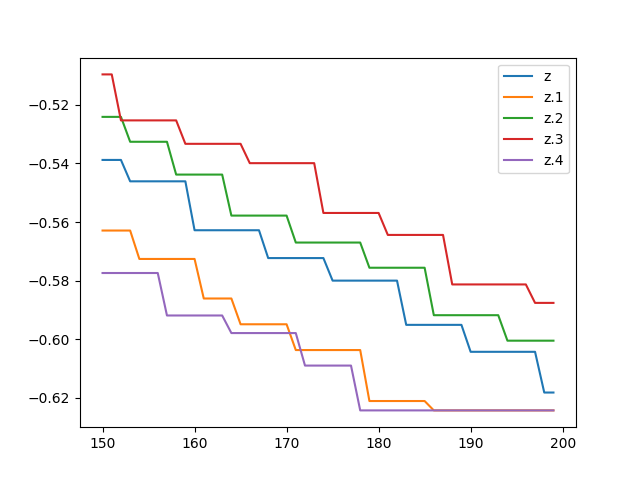

In [61]:
xy_splits['split_3'].plot()

<Axes: >

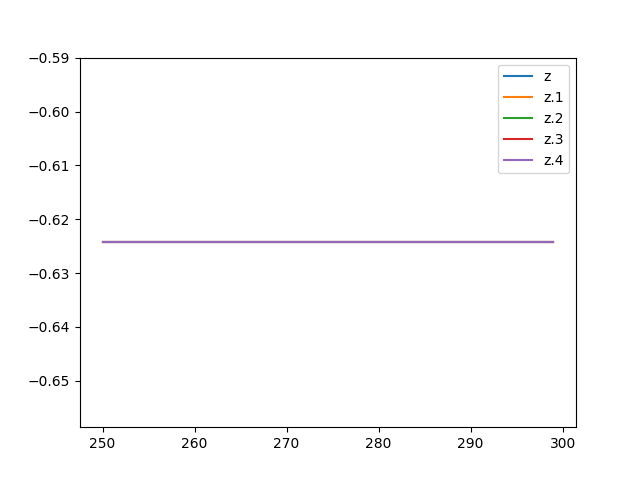

In [62]:
xy_splits['split_5'].plot()


In [63]:
xy_splits

{'split_0':          z     z.1     z.2     z.3     z.4
 0   0.0000  0.0000  0.0000  0.0000  0.0000
 1  -0.0060 -0.0171 -0.0020 -0.0003 -0.0061
 2  -0.0060 -0.0171 -0.0020 -0.0003 -0.0061
 3  -0.0060 -0.0171 -0.0020 -0.0003 -0.0061
 4  -0.0060 -0.0171 -0.0020 -0.0003 -0.0061
 5  -0.0060 -0.0171 -0.0020 -0.0003 -0.0061
 6  -0.0060 -0.0171 -0.0020 -0.0003 -0.0061
 7  -0.0060 -0.0171 -0.0020 -0.0003 -0.0061
 8  -0.0290 -0.0171 -0.0020 -0.0003 -0.0061
 9  -0.0290 -0.0171 -0.0558 -0.0150 -0.0061
 10 -0.0290 -0.0171 -0.0558 -0.0150 -0.0802
 11 -0.0290 -0.0171 -0.0558 -0.0150 -0.0802
 12 -0.0290 -0.0171 -0.0558 -0.0150 -0.0802
 13 -0.0290 -0.0171 -0.0558 -0.0150 -0.0802
 14 -0.0290 -0.1225 -0.0558 -0.0150 -0.0802
 15 -0.1167 -0.1225 -0.0558 -0.0150 -0.0802
 16 -0.1167 -0.1225 -0.1049 -0.0150 -0.1241
 17 -0.1167 -0.1225 -0.1049 -0.0765 -0.1241
 18 -0.1167 -0.1225 -0.1049 -0.0765 -0.1241
 19 -0.1167 -0.1225 -0.1049 -0.0765 -0.1241
 20 -0.1167 -0.1225 -0.1049 -0.0765 -0.1241
 21 -0.1167 -0.1225 -

In [64]:
# def batch_parser(batch_dict):
#     print("Testing")

#     split_features = {}

#     for i in range(0, 500, 1):
#         data_features = pd.DataFrame(batch_dict[f'split_{i}']).mean()
#         split_features[f'split_{i}'] = data_features
#         # data_features[i] = data_features

#     data_features_df = pd.DataFrame.from_dict(split_features, orient='index')

#     return data_features_df

In [65]:
# batch_df = batch_parser(xy_splits)

In [66]:
# batch_df.head()

In [67]:
# for i in range(0, 500, 1):
#     data_features = batch_df.iloc[i]
#     #split_features[f'split_{i}'] = data_features
#     print(data_features)
    

In [68]:


# def anomaly_detection(i):
#     print(f"Task executed at {time.ctime()}")
#     print("Testing")

    
#     split_features = {}

#     # for i in range(0, 500, 1):
    
#     data_features = pd.DataFrame(xy_splits[f'split_{i}']) #.mean()
#     # split_features[f'split_{i}'] = data_features
    
#     split_features = data_features
#     i += 1

#     print("split_features: ", split_features)
    
#     # data_features_df = pd.DataFrame.from_dict(split_features, orient='index')
    
#     df = split_features
#     print("df: ", df)
#     clf = LocalOutlierFactor(n_neighbors=15, contamination='auto')
#     y_pred = clf.fit_predict(df)

#     df['anomaly'] = y_pred
    
#     # df = np.concatenate([df, data_features], axis=0)
    
#     # Plot the normal points
#     normal_points = df[df['anomaly'] == 1]
#     # Plot the anomalies
#     anomalies = df[df['anomaly'] == -1]

#     # # Plot original data
#     # axs[0].scatter(df['x1'][:n_inliers], df['x2'][:n_inliers], color='b', label='Normal Points')
#     # axs[0].scatter(df['x1'][n_inliers:], df['x2'][n_inliers:], color='grey', label='Actual Anomalies')
#     # axs[0].set_title('Original Data')
#     # axs[0].legend()

#     plt.figure(figsize=(12, 10))
#     plt.scatter(normal_points['x'], normal_points['y'], color='b', label='Normal Points', s=0.7)
#     plt.scatter(anomalies['x'], anomalies['y'], color='r', label='Detected Anomalies', s=0.7)
#     plt.title('Anomaly Detection Results with k-NN')
#     plt.legend()
#     plt.show()
#     return i

# def indexer():
#     anomaly_detection(xy_splits, 1)
#     # j = 0
#     return anomaly_detection(xy_splits, 1)

# # schedule.every(5).seconds.do(batch_parser(xy_splits))
# # schedule.every(5).seconds.do(indexer())
# schedule.every(5).seconds.do(anomaly_detection)

# while True:
#     schedule.run_pending()
#     time.sleep(1)


In [69]:
df = data_combinedxy.iloc[0:2]
df.T


0       1
z    0.0 -0.0060
z.1  0.0 -0.0171
z.2  0.0 -0.0020
z.3  0.0 -0.0003
z.4  0.0 -0.0061

- Group first line of each historic dataset row by row and add first line of new df at the end. In this example there would be 4 historic and 1 new
- 

In [70]:
copy1
copy2
copy3
copy4

copy5

x       y       z
0       0.6612 -0.9845 -0.0061
1       0.6612 -0.9845 -0.0061
2       0.6612 -0.9845 -0.0061
3       0.6612 -0.9845 -0.0061
4       0.6612 -0.9845 -0.0061
...        ...     ...     ...
125698  2.5000  2.5000  0.0000
125699  2.5000  2.5000  0.0000
125700  2.5000  2.5000  0.0000
125701  2.5000  2.5000  0.0000
125702  2.5000  2.5000  0.0000

[125703 rows x 3 columns]

In [71]:
copy1.head(5)

x       y      z
0  0.6612 -0.9845 -0.006
1  0.6612 -0.9845 -0.006
2  0.6612 -0.9845 -0.006
3  0.6612 -0.9845 -0.006
4  0.6612 -0.9845 -0.006

In [72]:
copy2.head(5)

x       y       z
0  0.6612 -0.9845 -0.0171
1  0.6612 -0.9845 -0.0171
2  0.6612 -0.9845 -0.0171
3  0.6612 -0.9845 -0.0171
4  0.6612 -0.9845 -0.0171

In [73]:
copy3.head(5)

x       y      z
0  0.6612 -0.9845 -0.002
1  0.6612 -0.9845 -0.002
2  0.6612 -0.9845 -0.002
3  0.6612 -0.9845 -0.002
4  0.6612 -0.9845 -0.002

In [74]:
copy4.head(5)

x       y       z
0  0.6618 -0.9833 -0.0003
1  0.6618 -0.9833 -0.0003
2  0.6618 -0.9833 -0.0003
3  0.6618 -0.9833 -0.0003
4  0.6618 -0.9833 -0.0003

In [75]:
copy5.head(5)

x       y       z
0  0.6612 -0.9845 -0.0061
1  0.6612 -0.9845 -0.0061
2  0.6612 -0.9845 -0.0061
3  0.6612 -0.9845 -0.0061
4  0.6612 -0.9845 -0.0061

In [76]:
grouped_copies = [] # pd.DataFrame()

for i in range(0, 10, 1): # replace with length of smallest historic dataset
    row1 = copy1.iloc[i]
    row2 = copy2.iloc[i]
    row3 = copy3.iloc[i]
    row4 = copy4.iloc[i]
    row5 = copy5.iloc[i]

    grouped_copies.append(pd.concat([row1, row2, row3, row4, row5], axis=1)) # = pd.concat([row1, row2, row3, row4, row5], axis=1)
    

In [77]:
# xy_groups = 2500
grouped_copies = {}

for i in range(30000, 31000, 1):
    # p_data_split = p_data_df[(len(p_data_df)//xy_groups)*(i):(len(p_data_df)//xy_groups)*(i+1)] # splits shuffled data into groups

    row1 = copy1.iloc[i]
    row2 = copy2.iloc[i]
    row3 = copy3.iloc[i]
    row4 = copy4.iloc[i]
    row5 = copy5.iloc[i]


    grouped_copies[f'split_{i}'] = pd.concat([row1, row2, row3, row4, row5], axis=1)
    grouped_copies[f'split_{i}'] = grouped_copies[f'split_{i}'].T


In [78]:
grouped_copies['split_30000']

x       y       z
30000 -1.5686  1.1353 -0.6834
30000  0.1596  0.3197 -1.4114
30000 -0.7445  0.0767 -1.4114
30000  0.5430  0.1577 -1.4114
30000 -0.9090  0.2387 -1.4214

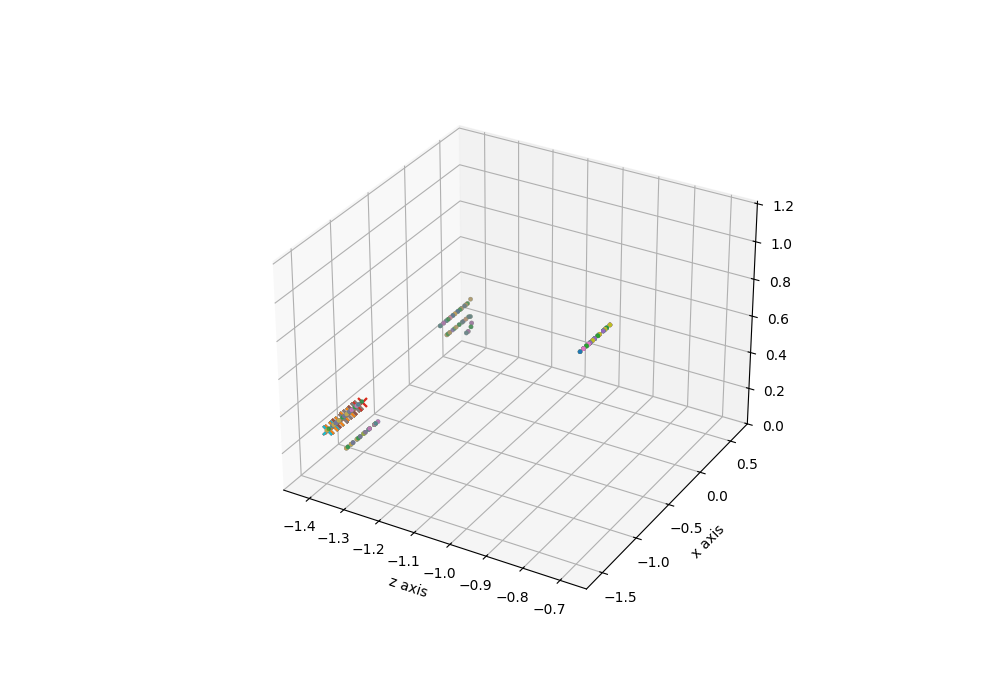

In [79]:
%matplotlib widget

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for i in range(30000, 30100, 1):
    # print("testing", i)
    ax.scatter(grouped_copies[f'split_{i}']['z'], grouped_copies[f'split_{i}']['x'], grouped_copies[f'split_{i}']['y'], marker='.', s=20)
    ax.scatter(grouped_copies[f'split_{i}']['z'].iloc[4], grouped_copies[f'split_{i}']['x'].iloc[4], grouped_copies[f'split_{i}']['y'].iloc[4], marker='x', s=40)

plt.xlabel('z axis')
plt.ylabel('x axis')
plt.show()


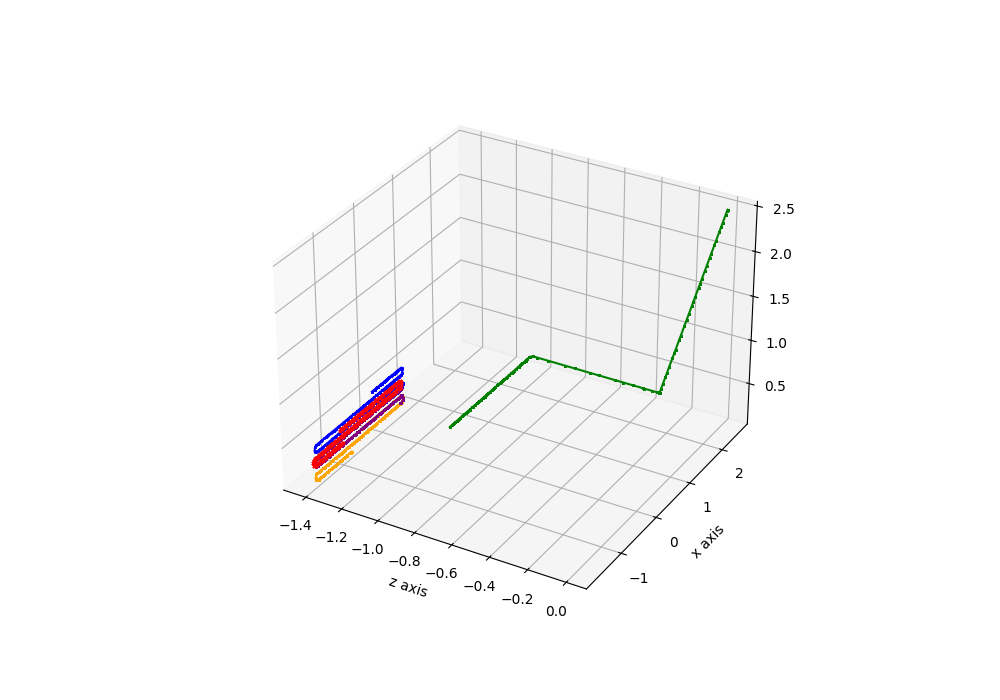

In [80]:
%matplotlib widget

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(copy1['z'].iloc[30000:31000], copy1['x'].iloc[30000:31000], copy1['y'].iloc[30000:31000], marker='.', markersize=2, c='g')
ax.plot(copy2['z'].iloc[30000:31000], copy2['x'].iloc[30000:31000], copy2['y'].iloc[30000:31000], marker='.', markersize=2, c='b')
ax.plot(copy3['z'].iloc[30000:31000], copy3['x'].iloc[30000:31000], copy3['y'].iloc[30000:31000], marker='.', markersize=2, c='orange')
ax.plot(copy4['z'].iloc[30000:31000], copy4['x'].iloc[30000:31000], copy4['y'].iloc[30000:31000], marker='.', markersize=2, c='purple')

ax.plot(copy5['z'].iloc[30000:31000], copy5['x'].iloc[30000:31000], copy5['y'].iloc[30000:31000], marker='x', markersize=2, c='r')


plt.xlabel('z axis')
plt.ylabel('x axis')
plt.show()

In [81]:
print(grouped_copies['split_30000'])

            x       y       z
30000 -1.5686  1.1353 -0.6834
30000  0.1596  0.3197 -1.4114
30000 -0.7445  0.0767 -1.4114
30000  0.5430  0.1577 -1.4114
30000 -0.9090  0.2387 -1.4214


In [82]:
print(grouped_copies['split_30100'])


            x       y       z
30100 -1.1336  1.1353 -0.6834
30100  0.6115  0.3301 -1.4114
30100 -1.1775  0.0767 -1.4114
30100  0.2535  0.2387 -1.4114
30100 -1.3775  0.2387 -1.4214


In [83]:
def e_distance(x, y, z, i, j, k):

    distance = np.sqrt((x-i)**2 + (y-j)**2 + (z-k)**2)

    return distance

def e_distance(x, x_train): # x_train is the historic data
    

    e_distance(x, x_train)

    return 

In [84]:
print(e_distance(-0.1818, 1.0537, -0.634, -1.3749, 0.3197, -1.4114)) # 1 2
print(e_distance(-0.1818, 1.0537, -0.634, 0.6612,  0.0767, -1.2706)) # 1 3
print(e_distance(-0.1818, 1.0537, -0.634, -1.3085,  0.1577, -1.4114)) # 1 4
print(e_distance(-0.1818, 1.0537, -0.634, -0.3385,  0.1577, -1.4214)) # 1 5
print(" ")
print(e_distance(-1.3749,  0.3197, -1.4114, 0.6612,  0.0767, -1.2706)) # 2 3
print(e_distance(-1.3749,  0.3197, -1.4114, -1.3085,  0.1577, -1.4114)) # 2 4
print(e_distance(-1.3749,  0.3197, -1.4114, 0.3385,  0.1577, -1.4214)) # 2 5
print(" ")
print(e_distance(0.6612,  0.0767, -1.2706, -1.3085,  0.1577, -1.4114)) # 3 4
print(e_distance(0.6612,  0.0767, -1.2706, 0.3385,  0.1577, -1.4214)) # 3 5
print(" ")
print(e_distance(-1.3085,  0.1577, -1.4114, 0.3385,  0.1577, -1.4214)) # 4 5


1.6020594152527552
1.4389015115705452
1.6360377899058445
1.2030667687206726
 
2.055377544394217
0.17507986748909765
1.7210704692138554
 
1.9763865335505604
0.36529019970428994
 
1.6470303579472967


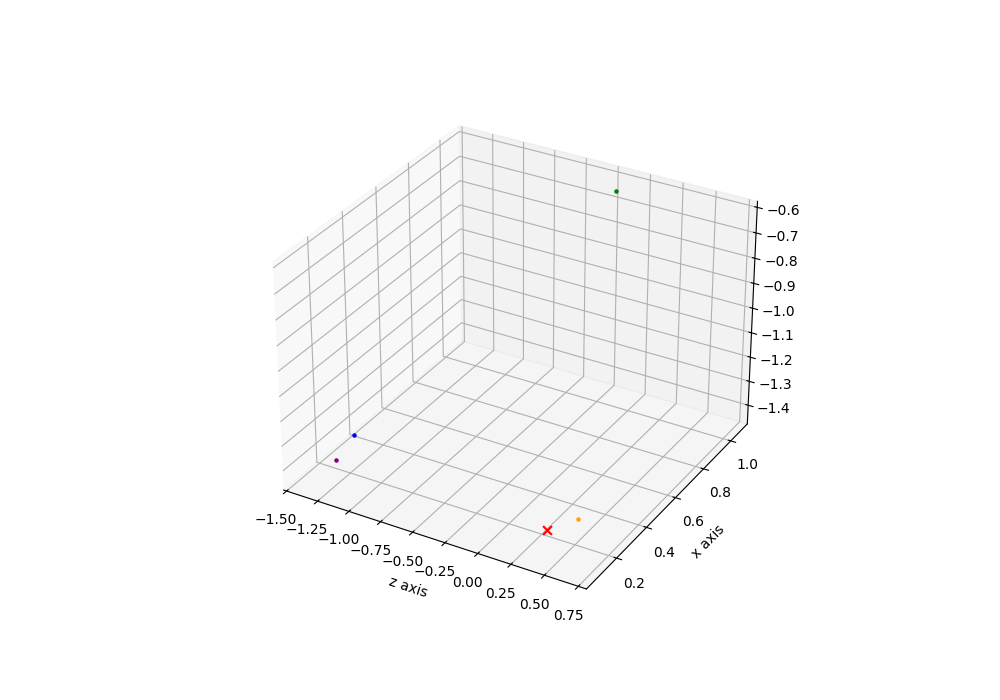

In [85]:
%matplotlib widget

fig = plt.figure(figsize=(10, 7)) # split_30000 why is green not flagged
ax = fig.add_subplot(projection='3d')
ax.scatter(-0.1818, 1.0537, -0.634, s=20, marker='.', c='g')
ax.scatter(-1.3749, 0.3197, -1.4114, s=20, marker='.', c='b') 
ax.scatter(0.6612,  0.0767, -1.2706, s=20, marker='.', c='orange')
ax.scatter(-1.3085,  0.1577, -1.4114, s=20, marker='.', c='purple')
ax.scatter(0.3385,  0.1577, -1.4214, s=40, marker='x', c='r')

plt.xlabel('z axis')
plt.ylabel('x axis')
plt.show()


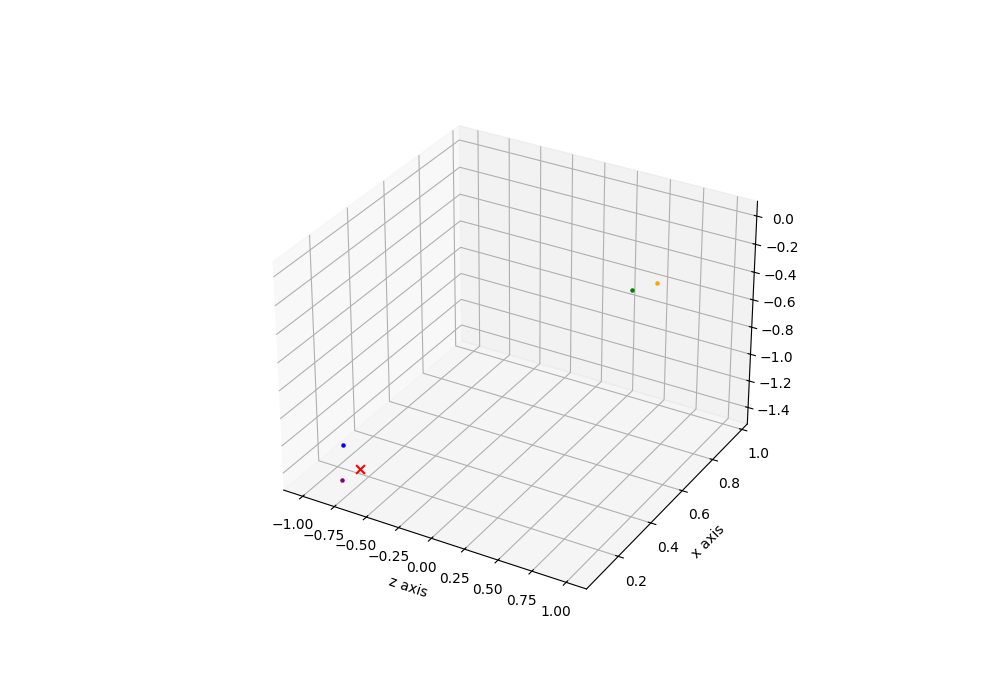

In [86]:
%matplotlib widget

fig = plt.figure(figsize=(10, 7)) # split_30000 why is green not flagged
ax = fig.add_subplot(projection='3d')
ax.scatter(0.3056,  0.9722, -0.6834, s=20, marker='.', c='g')
ax.scatter(-1.0050,  0.2387, -1.4114, s=20, marker='.', c='b') 
ax.scatter(1.0006,  0.5240,  0.0000, s=20, marker='.', c='orange')
ax.scatter(-0.7830,  0.0767, -1.4114, s=20, marker='.', c='purple')
ax.scatter(-0.7580,  0.1577, -1.4214, s=40, marker='x', c='r')

plt.xlabel('z axis')
plt.ylabel('x axis')
plt.show()


In [87]:
grouped_copies['split_30090']

x       y       z
30090 -1.1991  1.1353 -0.6834
30090  0.5656  0.3197 -1.4114
30090 -1.1575  0.0767 -1.4114
30090  0.2705  0.2387 -1.4114
30090 -1.3020  0.2387 -1.4214

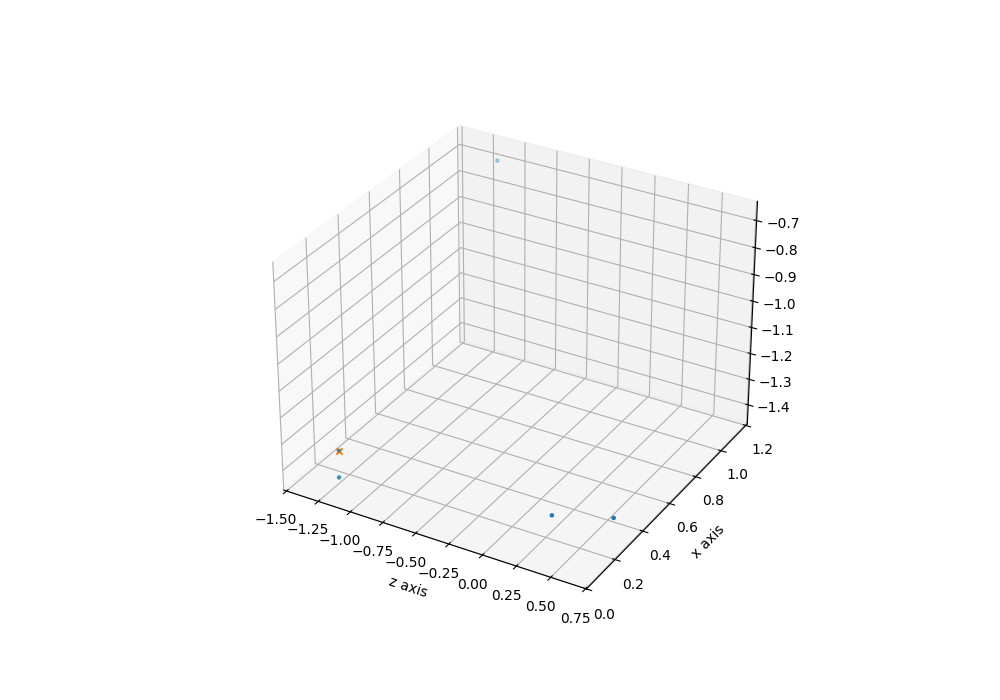

In [88]:
# graph for seeing groups and outlier
%matplotlib widget

fig = plt.figure(figsize=(10, 7)) # split_30000 why is green not flagged
ax = fig.add_subplot(projection='3d')
ax.scatter(grouped_copies['split_30100']['x'], grouped_copies['split_30100']['y'], grouped_copies['split_30100']['z'], s=20, marker='.')
ax.scatter(grouped_copies['split_30100']['x'].iloc[4], grouped_copies['split_30100']['y'].iloc[4], grouped_copies['split_30100']['z'].iloc[4], s=20, marker='x')

plt.xlabel('z axis')
plt.ylabel('x axis')
plt.show()

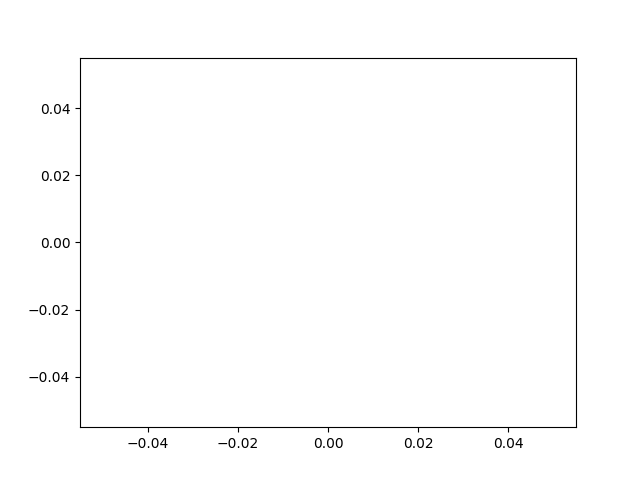

3
0
   30000  30001  30002  30003  30004  30005  30006  30007  30008  30009  ...  \
0      1      1      1      1      1      1      1      1      1      1  ...   
1      1      1      1      1      1      1      1      1      1      1  ...   
2      1      1      1      1      1      1      1      1      1      1  ...   

   30090  30091  30092  30093  30094  30095  30096  30097  30098  30099  
0      1      1      1      1      1      1      1      1      1      1  
1      1      1      1      1      1      1      1      1      1      1  
2      1      1      1      1      1      1      1      1      1      1  

[3 rows x 100 columns]
y-pred anomaly:     anomaly
0        1
1        1
2        1


In [89]:
i = 0

split_features = {}


# for i in range(0, 500, 1):
data_features = pd.DataFrame(xy_splits[f'split_{i}']) #.mean()
split_features[f'split_{i}'] = data_features

# split_features = data_features

# data_features_df = pd.DataFrame.from_dict(split_features, orient='index')
df = split_features[f'split_{0}']

fig, ax = plt.subplots()
scatter1 = ax.scatter([], []) # Initialize an empty scatter plot
scatter2 = ax.scatter([], []) # Initialize an empty scatter plot

# Plot the normal points
normal_points = pd.DataFrame()
# Plot the anomalies
anomalies = pd.DataFrame()

loop_batch = pd.DataFrame()

df_copy = pd.DataFrame()

for i in range(30000, 30100, 1): # range(30000, 30020, 1):

    # df = pd.DataFrame(np.concatenate([xy_splits[f'split_{i - 1}'], xy_splits[f'split_{i}']], axis=0))
    

    # for i in range(1, 200, 1):
    # p_data_std_features = pd.DataFrame(xy_splits[f'split_{i}'])
    # pocket_split_std_features[f'split_{i}'] = p_data_std_features
    
    df = grouped_copies[f'split_{i}'] # data_combinedxy.iloc[i-1:i]
    # df_copy[f'batch {i}'] = df

    clf = LocalOutlierFactor(n_neighbors=1, contamination='auto')
    y_pred = clf.fit_predict(df.T)

    df_anom = pd.DataFrame()
    # df['anomaly'] = y_pred
    df_anom['anomaly'] = y_pred
    
    
    # df = np.concatenate([df, data_features], axis=0)
    
    # Plot the normal points
    # normal_points.append(df_anom[df_anom['anomaly'] == 1])
    # # Plot the anomalies
    # anomalies.append(df_anom[df_anom['anomaly'] == -1])


    normal_points[f'batch {i}'] = df_anom[df_anom['anomaly'] == 1]
    # # Plot the anomalies
    anomalies[f'batch {i}'] = df_anom[df_anom['anomaly'] == -1]

    loop_batch[f'{i}'] = df_anom
    # plt.figure().clear()
    # fig = plt.figure()
    # plt.figure(figsize=(12, 10))
    # scatter1 = ax.scatter(normal_points[0], normal_points[1], color='b', label='Normal Points', s=0.7)
    # scatter2 = ax.scatter(anomalies[0], anomalies[1], color='r', label='Detected Anomalies', s=0.7)

    # plt.scatter(normal_points[0], normal_points[1], color='b', label='Normal Points', s=0.7)
    # plt.scatter(anomalies[0], anomalies[1], color='r', label='Detected Anomalies', s=0.7)

    # scatter1.set_offsets(np.c_[normal_points[0], normal_points[1]])
    # scatter2.set_offsets(np.c_[anomalies[0], anomalies[1]])

    # plt.title('Anomaly Detection Results with k-NN')
    # plt.show()
    fig.canvas.draw_idle()
    fig.canvas.flush_events()
    # plt.figure().clear()
    # plt.pause(0.05)
    time.sleep(0.5) # Pause for 0.5 seconds
    # plt.draw()
    # to flush the GUI events
    # plt.figure().canvas.flush_events()
    # time.sleep(1)

# plt.ioff()  # Turn off interactive mode
plt.show()
print(len(normal_points))
print(len(anomalies))
print(loop_batch)
print("y-pred anomaly: ", df_anom)
loop_batch = loop_batch.T
normal_points = normal_points.T
anomalies = anomalies.T


In [90]:
df_copy

Empty DataFrame
Columns: []
Index: []

In [91]:
y_pred

array([1, 1, 1])

In [92]:
loop_batch

0  1  2
30000  1  1  1
30001  1  1  1
30002  1  1  1
30003  1  1  1
30004  1  1  1
...   .. .. ..
30095  1  1  1
30096  1  1  1
30097  1  1  1
30098  1  1  1
30099  1  1  1

[100 rows x 3 columns]

In [93]:
normal_points

0  1  2
batch 30000  1  1  1
batch 30001  1  1  1
batch 30002  1  1  1
batch 30003  1  1  1
batch 30004  1  1  1
...         .. .. ..
batch 30095  1  1  1
batch 30096  1  1  1
batch 30097  1  1  1
batch 30098  1  1  1
batch 30099  1  1  1

[100 rows x 3 columns]

In [94]:
anomalies

Empty DataFrame
Columns: []
Index: [batch 30000, batch 30001, batch 30002, batch 30003, batch 30004, batch 30005, batch 30006, batch 30007, batch 30008, batch 30009, batch 30010, batch 30011, batch 30012, batch 30013, batch 30014, batch 30015, batch 30016, batch 30017, batch 30018, batch 30019, batch 30020, batch 30021, batch 30022, batch 30023, batch 30024, batch 30025, batch 30026, batch 30027, batch 30028, batch 30029, batch 30030, batch 30031, batch 30032, batch 30033, batch 30034, batch 30035, batch 30036, batch 30037, batch 30038, batch 30039, batch 30040, batch 30041, batch 30042, batch 30043, batch 30044, batch 30045, batch 30046, batch 30047, batch 30048, batch 30049, batch 30050, batch 30051, batch 30052, batch 30053, batch 30054, batch 30055, batch 30056, batch 30057, batch 30058, batch 30059, batch 30060, batch 30061, batch 30062, batch 30063, batch 30064, batch 30065, batch 30066, batch 30067, batch 30068, batch 30069, batch 30070, batch 30071, batch 30072, batch 30073, batch 30074, batch 30075, batch 30076, batch 30077, batch 30078, batch 30079, batch 30080, batch 30081, batch 30082, batch 30083, batch 30084, batch 30085, batch 30086, batch 30087, batch 30088, batch 30089, batch 30090, batch 30091, batch 30092, batch 30093, batch 30094, batch 30095, batch 30096, batch 30097, batch 30098, batch 30099]

[100 rows x 0 columns]

In [95]:
points1 = copy1.iloc[:, :3].to_numpy()

In [96]:
points1

array([[ 0.6612, -0.9845, -0.006 ],
       [ 0.6612, -0.9845, -0.006 ],
       [ 0.6612, -0.9845, -0.006 ],
       ...,
       [ 2.5   ,  2.5   ,  0.    ],
       [ 2.5   ,  2.5   ,  0.    ],
       [ 2.5   ,  2.5   ,  0.    ]], shape=(138224, 3))

In [97]:
tree1 = cKDTree(points1)

In [98]:
tree1 

In [104]:
distances1, _ = tree1.query(points1, k=2)

In [105]:
distances1

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]], shape=(138224, 2))

averages movement from good data and compare similarity to new data

In [268]:
mean_dist_hist

x       y        z
0       0.66135 -0.9842 -0.00635
1       0.66135 -0.9842 -0.00635
2       0.66135 -0.9842 -0.00635
3       0.66135 -0.9842 -0.00635
4       0.66135 -0.9842 -0.00635
...         ...     ...      ...
138219      NaN     NaN      NaN
138220      NaN     NaN      NaN
138221      NaN     NaN      NaN
138222      NaN     NaN      NaN
138223      NaN     NaN      NaN

[138224 rows x 3 columns]

In [269]:
import pandas as pd
import numpy as np
from scipy.spatial import cKDTree
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
 
# Load the CSV files

df1 = copy1#.iloc[40000:100000]
df2 = copy2#.iloc[40000:100000]
df3 = copy3#.iloc[40000:100000]
df4 = copy4#.iloc[40000:100000]

df5 = copy5#.iloc[40000:100000]

mean_dist_hist = (df1 + df2 + df3 + df4) / 4
mean_dist_hist = mean_dist_hist.dropna()

# Extract first 3 columns as x, y, z
points1 = df1.iloc[:, :3].to_numpy()
points2 = df2.iloc[:, :3].to_numpy()
points3 = df3.iloc[:, :3].to_numpy()
points4 = df4.iloc[:, :3].to_numpy()
points5 = df5.iloc[:, :3].to_numpy()

points6 = mean_dist_hist.iloc[:, :3].to_numpy()

# Build KD-Trees for efficient nearest-neighbor search
tree1 = cKDTree(points1)
tree2 = cKDTree(points2)
tree3 = cKDTree(points3)
tree4 = cKDTree(points4)
tree5 = cKDTree(points5)

tree6 = cKDTree(points6)

# For each point in points1, find closest point in points2
distances1, _ = tree2.query(points1, k=1)
# For each point in points2, find closest point in points1
distances2, _ = tree1.query(points2, k=1)
# 1 and 3
distances3, _ = tree3.query(points1, k=1)
distances4, _ = tree1.query(points3, k=1)
# 1 and 4
distances5, _ = tree4.query(points1, k=1)
distances6, _ = tree1.query(points4, k=1)

# 2 and 3
distances7, _ = tree3.query(points2, k=1)
distances8, _ = tree2.query(points3, k=1) 
# 2 and 4
distances9, _ = tree4.query(points2, k=1)
distances10, _ = tree2.query(points4, k=1)
# 3 and 4
distances11, _ = tree4.query(points3, k=1)
distances12, _ = tree3.query(points4, k=1)


# Chamfer-like distance (bi-directional mean distance)
mean_dist = (distances1 + distances2 + distances3 + distances4  / 
                    + distances5 + distances6 + distances7 + distances8 /
                    + distances9 + distances10 + distances11 + distances12) / 12

distances13, _ = tree5.query(points6, k=1)
distances14, _ = tree6.query(points4, k=1)

average_min_dist = (np.mean(distances13) + np.mean(distances14)) / 2


# Optional: visualize the scatter plot again
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points1[:,0], points1[:,1], points1[:,2], c='blue', label='Dataset 1', alpha=0.6)
ax.scatter(points2[:,0], points2[:,1], points2[:,2], c='red', label='Dataset 2', alpha=0.6)
ax.set_title(f'3D Scatter Plot (Similarity: {average_min_dist:.4f})')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

print(f"Average Minimum Distance Similarity: {average_min_dist:.4f}")
print(f"Average Minimum Distance Similarity: {average_min_dist:.4f}")

ValueError: operands could not be broadcast together with shapes (138224,) (127937,) 

In [131]:
mean_dist

array([3.31240106, 0.31560295, 0.31567524, ..., 0.97440821, 0.97440821,
       0.97440821], shape=(60000,))

In [109]:
distances1

array([0.06914167, 0.07003406, 0.07003406, ..., 0.0156205 , 0.0156205 ,
       0.0156205 ], shape=(60000,))

In [257]:
xnum

0  1
0  1  1
0  2  3
0  2  2
0  1  5

IQRx outlier upper:  3.5
IQRx outlier lower:  -0.5
IQRy outlier upper:  6.125
IQRy outlier lower:  -0.875
     0     1
0  1.5  2.75
Standard deviation for distance:  [0.88388348]
Upper:       0     1
0  1.5  2.75
Test upper:       0         1
0  1.5  3.633883
Test lower:       0         1
0  1.5  1.866117


c:\Users\jas45\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\transforms.py:2054: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self._mtx[0, 0] *= sx
c:\Users\jas45\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\transforms.py:2055: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self._mtx[0, 1] *= sx
c:\Users\jas45\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\transforms.py:2056: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self._mtx[0, 2] *= sx
c:\Users\jas45\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\transforms.py:2057: FutureWarning: Calling float on a single element Series is deprecated and will rais

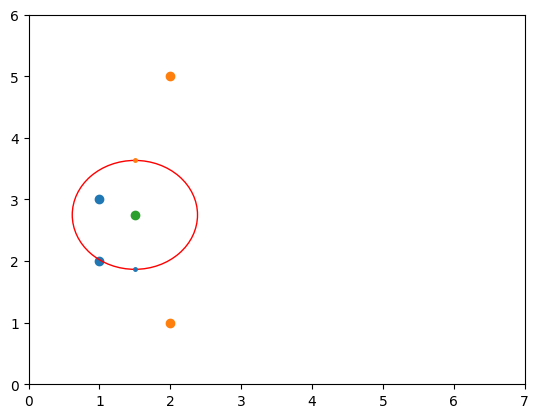

In [265]:
dist1 = [1, 1]
dist2 = [2, 3]
dist3 = [2, 2]
dist4 = [1, 5]

dist1 = pd.DataFrame(dist1)
dist2 = pd.DataFrame(dist2)
dist3 = pd.DataFrame(dist3)
dist4 = pd.DataFrame(dist4)

dist1 = dist1.T
dist2 = dist2.T
dist3 = dist3.T
dist4 = dist4.T

xnum = pd.concat([dist1, dist2, dist3, dist4], axis=0)

q1x = np.percentile(xnum[0], 25)
q3x = np.percentile(xnum[0], 75)

q1y = np.percentile(xnum[1], 25)
q3y = np.percentile(xnum[1], 75)

iqrx = q3x - q1x
iqry = q3y - q1y

outlier_factorx = iqrx*1.5
outlier_factory = iqry*1.5

upper_threshx = q3x + outlier_factorx
lower_threshx = q1x - outlier_factorx

upper_threshy = q3y + outlier_factory
lower_threshy = q1y - outlier_factory


print("IQRx outlier upper: ", upper_threshx)
print("IQRx outlier lower: ", lower_threshx)

print("IQRy outlier upper: ", upper_threshy)
print("IQRy outlier lower: ", lower_threshy)

mean_dist6 = (dist1 + dist2 + dist3 + dist4) / 4
# mean_dist6 = mean_dist6.T

dist6_std = mean_dist6.T.std()

print(mean_dist6)
print("Standard deviation for distance: ", dist6_std.values)

upper = mean_dist6.copy()
lower = mean_dist6.copy()

print("Upper: ", upper)


upper[1] = upper[1] + dist6_std.values
lower[1] =  lower[1] - dist6_std.values

print("Test upper: ", upper)
print("Test lower: ", lower)

circle = Circle((mean_dist6), radius=dist6_std, color='red', fill=False)

# plt.figure(figsize=(8, 6))

fig, ax = plt.subplots()

plt.scatter(dist1, dist2)
plt.scatter(dist3, dist4)

plt.scatter(mean_dist6[0], mean_dist6[1])
plt.plot(lower[0], lower[1], marker='.', markersize=5)
plt.plot(upper[0], upper[1], marker='.', markersize=5)
plt.xlim(0, 7)
plt.ylim(0, 6)

ax.add_patch(circle)
# ax.set_aspect('equal', adjustable='box')

plt.show()

IQRx outlier upper:  3.5
IQRx outlier lower:  -0.5
IQRy outlier upper:  6.125
IQRy outlier lower:  -0.875


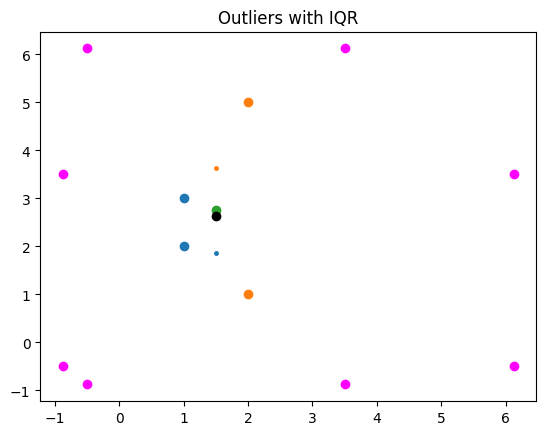

In [306]:
print("IQRx outlier upper: ", upper_threshx)
print("IQRx outlier lower: ", lower_threshx)

print("IQRy outlier upper: ", upper_threshy)
print("IQRy outlier lower: ", lower_threshy)


circle = Circle((mean_dist6), radius=dist6_std, color='red', fill=False)

# plt.figure(figsize=(8, 6))

fig, ax = plt.subplots()

plt.title('Outliers with IQR')

plt.scatter(dist1, dist2)
plt.scatter(dist3, dist4)

plt.scatter(mean_dist6[0], mean_dist6[1])
plt.plot(lower[0], lower[1], marker='.', markersize=5)
plt.plot(upper[0], upper[1], marker='.', markersize=5)


plt.scatter(lower_threshy, upper_threshx, c='magenta')
plt.scatter(lower_threshy, lower_threshx, c='magenta')
plt.scatter(upper_threshy, upper_threshx, c='magenta')
plt.scatter(upper_threshy, lower_threshx, c='magenta')

plt.scatter(upper_threshx, lower_threshy, c='magenta')
plt.scatter(lower_threshx, lower_threshy, c='magenta')
plt.scatter(upper_threshx, upper_threshy, c='magenta')
plt.scatter(lower_threshx, upper_threshy, c='magenta')


mean_iqr_pointx = (upper_threshx + lower_threshx) / 2
mean_iqr_pointy = (upper_threshy + lower_threshy) / 2

plt.scatter(mean_iqr_pointx, mean_iqr_pointy, c='black')

# plt.xlim(0, 7)
# plt.ylim(0, 6)

# ax.add_patch(circle)
# ax.set_aspect('equal', adjustable='box')

plt.show()

calculating axis uncertainty

In [ ]:
def uncertainty_p(s1): # change to for loop for different number of variables and uncertainties with terminal input

    up = np.sqrt((s1)**2 + (s1)**2 + (s1)**2 + (s1)**2 + (s1)**2)

    return up

In [305]:
uncertainty_p(0.005) # add this to the final part (x +- uncertainty_p)

np.float64(0.011180339887498949)

In [169]:
upper = mean_dist6
lower = mean_dist6

In [213]:
lower[0]

0    1.5
Name: 0, dtype: float64

In [175]:
upper[1] = upper[1] + dist6_std.values
upper

0         1
0  1.5  3.633883

In [100]:
# df_copy = df_copy.drop


# df_copy = pd.DataFrame(df_copy, columns=['z', 'z.1', 'z.2', 'z.3', 'z.4'])

AttributeError: 'Axes3D' object has no attribute 'scater'

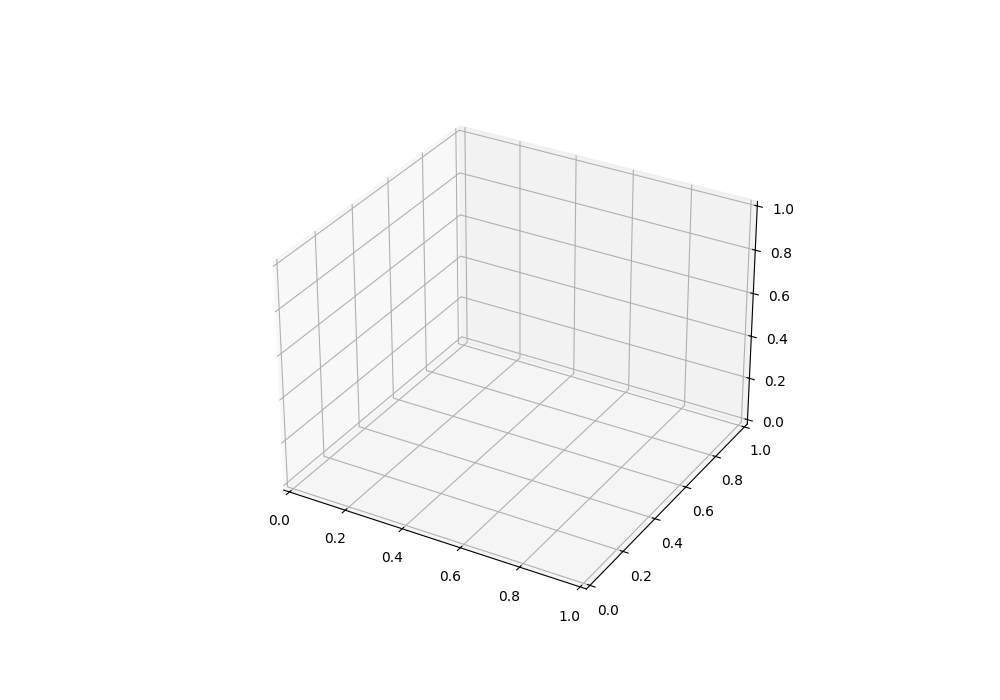

In [101]:

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
# fig.canvas.draw()
# fig.set_layout_engine("none")
# ax.set_position([-0.75, 0.025, 2.5, 1]) 

# Plot the normal points
# normal_points = data_combinedxy[data_combinedxy['anomaly'] == 1]
# Plot the anomalies
# anomalies = data_combinedxy[data_combinedxy['anomaly'] == -1]

# # Plot original data
# axs[0].scatter(df['x1'][:n_inliers], df['x2'][:n_inliers], color='b', label='Normal Points')
# axs[0].scatter(df['x1'][n_inliers:], df['x2'][n_inliers:], color='grey', label='Actual Anomalies')
# axs[0].set_title('Original Data')
# axs[0].legend()

# plt.figure(figsize=(12, 10))
ax.scater(loop_batch[0], loop_batch[1], loop_batch[2], marker='.', \
          color='b', label='Normal Points', markersize=5)
# ax.plot(anomalies[0], anomalies[1], anomalies[2], marker='x', \
#          color='r', label='Detected Anomalies', markersize=5)
plt.title('Anomaly Detection Results with k-NN')
plt.legend()

plt.show()
print(len(normal_points))
print(len(anomalies))

In [ ]:
copy4

x    y    z
0       2.5  2.5  0.0
1       2.5  2.5  0.0
2       2.5  2.5  0.0
3       2.5  2.5  0.0
4       2.5  2.5  0.0
...     ...  ...  ...
127995  2.5  2.5  0.0
127996  2.5  2.5  0.0
127997  2.5  2.5  0.0
127998  2.5  2.5  0.0
127999  2.5  2.5  0.0

[128000 rows x 3 columns]

In [ ]:
data_combinedxy

z     z.1     z.2     z.3     z.4
0       0.0000  0.0000  0.0000  0.0000  0.0000
1      -0.0060 -0.0171 -0.0020 -0.0003 -0.0061
2      -0.0060 -0.0171 -0.0020 -0.0003 -0.0061
3      -0.0060 -0.0171 -0.0020 -0.0003 -0.0061
4      -0.0060 -0.0171 -0.0020 -0.0003 -0.0061
...        ...     ...     ...     ...     ...
125670 -1.8938 -1.9529 -1.9529 -0.7163  0.0000
125671 -1.8938 -1.9529 -1.9529 -0.7163  0.0000
125672 -1.8938 -1.9529 -1.9529 -0.6584  0.0000
125673 -1.8938 -1.9529 -1.9529 -0.6584  0.0000
125674 -1.8938 -1.9529 -1.9529 -0.6584  0.0000

[125675 rows x 5 columns]

In [ ]:
anomalies

Empty DataFrame
Columns: []
Index: [batch 30000, batch 30001, batch 30002, batch 30003, batch 30004, batch 30005, batch 30006, batch 30007, batch 30008, batch 30009, batch 30010, batch 30011, batch 30012, batch 30013, batch 30014, batch 30015, batch 30016, batch 30017, batch 30018, batch 30019, batch 30020, batch 30021, batch 30022, batch 30023, batch 30024, batch 30025, batch 30026, batch 30027, batch 30028, batch 30029, batch 30030, batch 30031, batch 30032, batch 30033, batch 30034, batch 30035, batch 30036, batch 30037, batch 30038, batch 30039, batch 30040, batch 30041, batch 30042, batch 30043, batch 30044, batch 30045, batch 30046, batch 30047, batch 30048, batch 30049]

In [ ]:
xy_splits

{'split_0':          z     z.1     z.2     z.3     z.4
 0   0.0000  0.0000  0.0000  0.0000  0.0000
 1  -0.0060 -0.0171 -0.0020 -0.0003 -0.0061
 2  -0.0060 -0.0171 -0.0020 -0.0003 -0.0061
 3  -0.0060 -0.0171 -0.0020 -0.0003 -0.0061
 4  -0.0060 -0.0171 -0.0020 -0.0003 -0.0061
 5  -0.0060 -0.0171 -0.0020 -0.0003 -0.0061
 6  -0.0060 -0.0171 -0.0020 -0.0003 -0.0061
 7  -0.0060 -0.0171 -0.0020 -0.0003 -0.0061
 8  -0.0290 -0.0171 -0.0020 -0.0003 -0.0061
 9  -0.0290 -0.0171 -0.0558 -0.0150 -0.0061
 10 -0.0290 -0.0171 -0.0558 -0.0150 -0.0802
 11 -0.0290 -0.0171 -0.0558 -0.0150 -0.0802
 12 -0.0290 -0.0171 -0.0558 -0.0150 -0.0802
 13 -0.0290 -0.0171 -0.0558 -0.0150 -0.0802
 14 -0.0290 -0.1225 -0.0558 -0.0150 -0.0802
 15 -0.1167 -0.1225 -0.0558 -0.0150 -0.0802
 16 -0.1167 -0.1225 -0.1049 -0.0150 -0.1241
 17 -0.1167 -0.1225 -0.1049 -0.0765 -0.1241
 18 -0.1167 -0.1225 -0.1049 -0.0765 -0.1241
 19 -0.1167 -0.1225 -0.1049 -0.0765 -0.1241
 20 -0.1167 -0.1225 -0.1049 -0.0765 -0.1241
 21 -0.1167 -0.1225 -

In [ ]:
data_xy_copy

z    z    z    z    z
0       0.0  0.0  0.0  0.0  0.0
1       0.0  0.0  0.0  0.0  0.0
2       0.0  0.0  0.0  0.0  0.0
3       0.0  0.0  0.0  0.0  0.0
4       0.0  0.0  0.0  0.0  0.0
...     ...  ...  ...  ...  ...
138983  0.0  NaN  NaN  NaN  NaN
138984  0.0  NaN  NaN  NaN  NaN
138985  0.0  NaN  NaN  NaN  NaN
138986  0.0  NaN  NaN  NaN  NaN
138987  0.0  NaN  NaN  NaN  NaN

[138988 rows x 5 columns]

In [ ]:
copy5

x    y    z
0       2.5  2.5  0.0
1       2.5  2.5  0.0
2       2.5  2.5  0.0
3       2.5  2.5  0.0
4       2.5  2.5  0.0
...     ...  ...  ...
126447  2.5  2.5  0.0
126448  2.5  2.5  0.0
126449  2.5  2.5  0.0
126450  2.5  2.5  0.0
126451  2.5  2.5  0.0

[126452 rows x 3 columns]

In [ ]:
len(copy4) + len(copy3) + len(copy2) + len(copy1)

525362

In [ ]:
print((anomalies.index < 139458).sum())

TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:
print((anomalies.index < 139458).sum() / len(anomalies)) # precent of detected anomalies are copy1

In [ ]:
print((anomalies.index > 528064).sum())

In [ ]:
print((anomalies.index > 528064).sum() / len(anomalies)) # percent of detected anomalies are bad_data

In [ ]:
print((anomalies.index < 900).sum()) # check if index is being used correctly

In [ ]:
anomalies_index_df = pd.DataFrame(anomalies.index)
bad_index_df = pd.DataFrame(data_combinedxy.index > 528064)
bad_data_from_total = bad_index_df[bad_index_df[0] == True]
anomaly_set = set(anomalies.index)
bad_set = set(bad_data_from_total.index)

common = anomaly_set.intersection(bad_set) # number of bad_data are in anomalies detected

In [ ]:
len(common)

In [ ]:
print("Percent detected: ", ((len(common)/(len(anomalies))) * 100))

In [ ]:
cube_gcode_values = pd.read_csv("cube_gcode_movement_num.csv", delimiter=',')


In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(cube_gcode_values['x'].loc[:100], cube_gcode_values['y'].loc[:100], marker='.', s=50)
plt.scatter(copy2['x'].loc[:20000], copy2['y'].loc[:20000], marker='.', s=5)
plt.xlabel('x  axis')
plt.ylabel('y axis')
# plt.ylim(-2.8, -2.3)
plt.show()

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(copy2['x'].loc[:20000], copy2['y'].loc[:20000], marker='.', s=5)
plt.xlabel('y axis')
plt.ylabel('z axis')
# plt.ylim(-2.8, -2.3)
plt.show()

In [ ]:
cube_gcode_values.drop(columns=['a', 'b']).plot(figsize=(12, 3))

In [ ]:
copy2.drop(columns=['a', 'b']).plot(figsize=(12, 3))


In [ ]:
spiral_gcode_a = spiral_gcode_orig.copy()
spiral_gcode_b = spiral_gcode_orig.copy()
spiral_gcode_x = spiral_gcode_orig.copy()
spiral_gcode_y = spiral_gcode_orig.copy()
spiral_gcode_z = spiral_gcode_orig.copy()

spiralmaska = ~spiral_gcode_a.astype(str).apply(lambda col: col.str.contains('A', na=False))
# Replace values in the DataFrame where the mask is True with 0
spiral_gcode_a[spiralmaska] = 0

spiralmaskb = ~spiral_gcode_b.astype(str).apply(lambda col1: col1.str.contains('B', na=False))
spiral_gcode_b[spiralmaskb] = 0

spiralmaskx = ~spiral_gcode_x.astype(str).apply(lambda col2: col2.str.contains('X', na=False))
spiral_gcode_x[spiralmaskx] = 0

spiralmasky = ~spiral_gcode_y.astype(str).apply(lambda col3: col3.str.contains('Y', na=False))
spiral_gcode_y[spiralmasky] = 0

spiralmaskz = ~spiral_gcode_z.astype(str).apply(lambda col4: col4.str.contains('Z', na=False))
spiral_gcode_z[spiralmaskz] = 0


aspiralmelted_df = spiral_gcode_a.reset_index().melt(id_vars='index', var_name='original_column', value_name='value')
non_zero_values = aspiralmelted_df[aspiralmelted_df['value'] != 0]
combined_column = non_zero_values.groupby('index')['value'].apply(list)
result_series = combined_column.reindex(spiral_gcode_a.index, fill_value=0)
a_spiral_df = pd.DataFrame(result_series)
a_spiral_df.columns = ['b']

bspiralmelted_df = spiral_gcode_b.reset_index().melt(id_vars='index', var_name='original_column', value_name='value')
non_zero_values = bspiralmelted_df[bspiralmelted_df['value'] != 0]
combined_column = non_zero_values.groupby('index')['value'].apply(list)
result_series = combined_column.reindex(spiral_gcode_b.index, fill_value=0)
b_spiral_df = pd.DataFrame(result_series)
b_spiral_df.columns = ['b']

xspiralmelted_df = spiral_gcode_x.reset_index().melt(id_vars='index', var_name='original_column', value_name='value')
non_zero_values = xspiralmelted_df[xspiralmelted_df['value'] != 0]
combined_column = non_zero_values.groupby('index')['value'].apply(list)
result_series = combined_column.reindex(spiral_gcode_x.index, fill_value=0)
x_spiral_df = pd.DataFrame(result_series)
x_spiral_df.columns = ['x']

yspiralmelted_df = spiral_gcode_y.reset_index().melt(id_vars='index', var_name='original_column', value_name='value')
non_zero_values = yspiralmelted_df[yspiralmelted_df['value'] != 0]
combined_column = non_zero_values.groupby('index')['value'].apply(list)
result_series = combined_column.reindex(spiral_gcode_y.index, fill_value=0)
y_spiral_df = pd.DataFrame(result_series)
y_spiral_df.columns = ['y']

zspiralmelted_df = spiral_gcode_z.reset_index().melt(id_vars='index', var_name='original_column', value_name='value')
non_zero_values = zspiralmelted_df[zspiralmelted_df['value'] != 0]
combined_column = non_zero_values.groupby('index')['value'].apply(list)
result_series = combined_column.reindex(spiral_gcode_z.index, fill_value=0)
z_spiral_df = pd.DataFrame(result_series)
z_spiral_df.columns = ['z']

spiral_df = pd.concat([a_spiral_df, b_spiral_df, x_spiral_df, y_spiral_df, z_spiral_df], axis=1)
# spiral_df.to_csv('spiral_gcode_movement_num.csv', index=False)

In [ ]:
gcode_movement_values = pd.read_csv("gcode_movement_num.csv", delimiter=',')

Classification report

In [ ]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)